In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iabhishekofficial/mobile-price-classification")

print("Path to dataset files:", path)

100%|██████████| 70.6k/70.6k [00:00<00:00, 324kB/s]

Extracting files...
Path to dataset files: /Users/furkanmelih/.cache/kagglehub/datasets/iabhishekofficial/mobile-price-classification/versions/1


In [2]:
import pandas as pd

In [4]:
df = pd.read_csv(f"{path}/train.csv")

In [5]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [7]:
label_encoder = LabelEncoder().fit(df["price_range"])

In [8]:
label_encoder

LabelEncoder()

In [9]:
labels = label_encoder.transform(df["price_range"])

In [10]:
labels

array([1, 2, 2, ..., 3, 0, 3], shape=(2000,))

In [11]:
classes = list(label_encoder.classes_)

In [12]:
classes

[np.int64(0), np.int64(1), np.int64(2), np.int64(3)]

In [13]:
X = df.drop(["price_range"], axis=1)
y = labels

In [14]:
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [15]:
y

array([1, 2, 2, ..., 3, 0, 3], shape=(2000,))

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
sc = StandardScaler()

In [18]:
X = sc.fit_transform(X)

In [20]:
X

array([[-0.90259726, -0.9900495 ,  0.83077942, ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-0.49513857,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789, -1.01409939],
       [ 0.62252745, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.55964063,
         0.99401789,  0.98609664]], shape=(2000, 20))

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [23]:
from tensorflow.keras.utils import to_categorical

In [24]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [25]:
y_train

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], shape=(1600, 4))

In [26]:
y_test

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]], shape=(400, 4))

In [27]:
from tensorflow.keras.models import Sequential

In [28]:
from tensorflow.keras.layers import Dense

In [29]:
model = Sequential()
model.add(Dense(16, input_dim=20, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(4, activation="softmax"))
model.summary()

/Users/furkanmelih/personal_projects/okul/yapay_zeka/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 508 (1.98 KB)

 Trainable params: 508 (1.98 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
compiled_model = model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [31]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30)

Epoch 1/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2794 - loss: 1.4726 - val_accuracy: 0.3175 - val_loss: 1.3861
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step - accuracy: 0.3519 - loss: 1.3366 - val_accuracy: 0.4050 - val_loss: 1.2947
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - accuracy: 0.4263 - loss: 1.2453 - val_accuracy: 0.4625 - val_loss: 1.1962
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - accuracy: 0.5031 - loss: 1.1424 - val_accuracy: 0.5500 - val_loss: 1.0763
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - accuracy: 0.5650 - loss: 1.0202 - val_accuracy: 0.6100 - val_loss: 0.9473
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - accuracy: 0.6275 - loss: 0.8966 - val_accuracy: 0.6550 - val_loss: 0.8272
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - accuracy: 0.6700 - loss: 0.7896 - val_accuracy: 0.6950 - val_loss: 0.7291
Epoch 8/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - accuracy: 0.7125 - loss: 0.7007 - val_accuracy: 0.73

In [32]:
import matplotlib.pyplot as plt

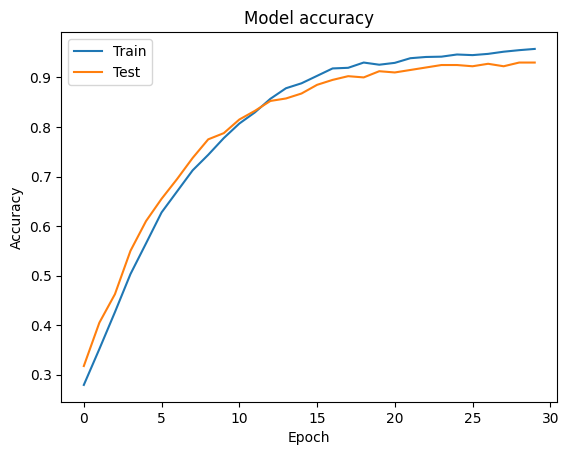

In [33]:
plt.plot(model.history.history["accuracy"])
plt.plot(model.history.history["val_accuracy"])

plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()

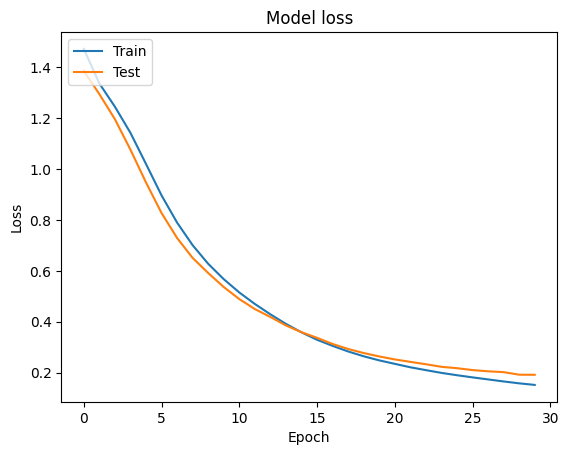

In [35]:
plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()

In [66]:
from keras.optimizers import Adam

In [67]:
def create_model(learning_rate=0.001):
    _model = Sequential()
    _model.add(Dense(16, input_dim=20, activation="relu"))
    _model.add(Dense(8, activation="relu"))
    _model.add(Dense(4, activation="softmax"))
    _model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return _model


In [68]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from scikeras.wrappers import KerasClassifier

In [69]:
clf = KerasClassifier(
    model=create_model,
    model__learning_rate=0.001,
    epochs=30,
    batch_size=16,
    verbose=0
)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = cross_val_score(clf, X, y, cv=kfold)

print("Cross-validation scores:", results)
print("Mean accuracy:", results.mean())

/Users/furkanmelih/personal_projects/okul/yapay_zeka/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/furkanmelih/personal_projects/okul/yapay_zeka/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/furkanmelih/personal_projects/okul/yapay_zeka/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using a

Cross-validation scores: [0.895  0.93   0.905  0.9225 0.935 ]
Mean accuracy: 0.9175000000000001


In [54]:
kfold

StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

In [70]:
new_df = df.copy()

In [71]:
new_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [73]:
new_df = new_df.drop(["blue", "fc", "int_memory", "ram", "wifi"], axis=1)

In [74]:
new_df.head()

,battery_power,clock_speed,dual_sim,four_g,m_dep,mobile_wt,n_cores,pc,px_height,px_width,sc_h,sc_w,talk_time,three_g,touch_screen,price_range
0,842,2.2,0,0,0.6,188,2,2,20,756,9,7,19,0,0,1
1,1021,0.5,1,1,0.7,136,3,6,905,1988,17,3,7,1,1,2
2,563,0.5,1,1,0.9,145,5,6,1263,1716,11,2,9,1,1,2
3,615,2.5,0,0,0.8,131,6,9,1216,1786,16,8,11,1,0,2
4,1821,1.2,0,1,0.6,141,2,14,1208,1212,8,2,15,1,1,1


In [ ]:
X_new = X
